# **\[SOLAR_A\]** gconvlstm

JiyunLim  
2023-08-31

## GConvLSTM

In [1]:
%run test_model/glstm

In [2]:
# read dataframe 
df = pd.read_csv('data_eng_230710.csv')

# make y, y_upper, y_period, time, regions 
y = df.loc[:,'Bukchoncheon':'Gyeongju-si'].to_numpy()
yU = df.loc[:,'Bukchoncheon_Upper':'Gyeongju-si_Upper'].to_numpy()
yP = np.divide(y, yU+1e-10)

t = df.loc[:,'date']
regions = list(df.loc[:, 'Bukchoncheon':'Gyeongju-si'].columns)

In [3]:
# global parameters
TRAIN_RATIO = 0.8
T, N = len(t), len(regions)
LEN_TEST = int(np.floor(T*(1-TRAIN_RATIO)))
LEN_TR = T - LEN_TEST

In [4]:
# create lrnr object
lrnr = RGCN_Learner()
# load data
lrnr.lags = 24
lrnr.train_ratio = 0.8
lrnr.load(y)
# construct network
lrnr.nof_filters = 16
lrnr.model = GConv_LSTM(node_features=lrnr.lags, filters=lrnr.nof_filters).to(device)
lrnr.optimizer = torch.optim.Adam(lrnr.model.parameters(), lr=10/1000)
# learn
lrnr.get_batches(128)
for e in range(10):
    lrnr.learn()

epoch=1  loss=0.5747611671686172862312317   
epoch=2  loss=0.2207127879373729260275269   
epoch=3  loss=0.1501223817467689553352356   
epoch=4  loss=0.1311946823261678290195465   
epoch=5  loss=0.1151423770934343337961578   
epoch=6  loss=0.1059583108872175246683884   
epoch=7  loss=0.1007229355163872278368378   
epoch=8  loss=0.0953102768398821479896927   
epoch=9  loss=0.0917466324754059380584335   
epoch=10     loss=0.089829471893608579399796        

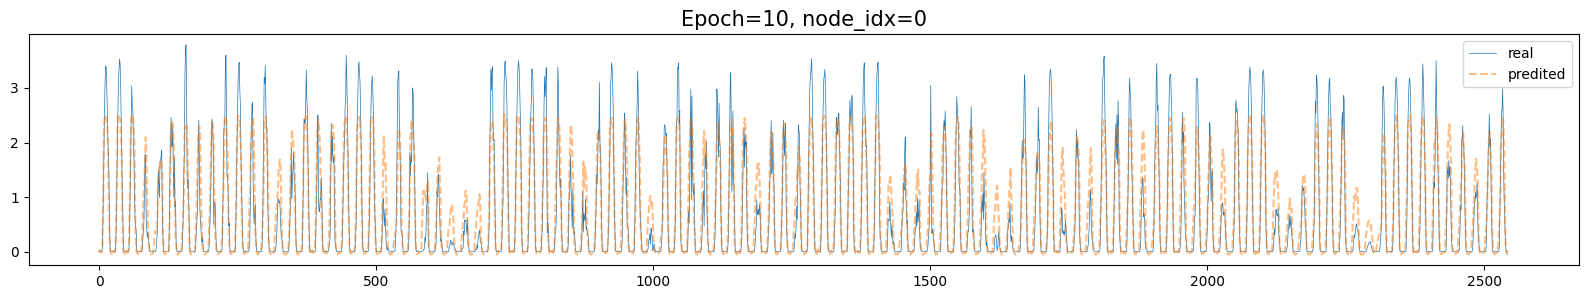

In [5]:
lrnr.figs[-1]

In [6]:
yhat = np.concatenate([np.array([list(lrnr.yhat[0])]*lrnr.lags),lrnr.yhat],axis=0)
yhat[yhat<0] = 0

In [7]:
((y - yhat)[LEN_TR:,:]**2).mean()

In [10]:
lrnr1 = RGCN_Learner()
lrnr1.lags = 1
lrnr1.train_ratio = 0.8
lrnr1.load(yU)

lrnr1.nof_filters = 16
lrnr1.model = GConv_LSTM(node_features=lrnr1.lags, filters=lrnr1.nof_filters).to(device)
lrnr1.optimizer = torch.optim.Adam(lrnr1.model.parameters(), lr=10/1000)

lrnr1.get_batches(24)
for e in range(5):
    lrnr1.learn()

epoch=1  loss=1.32804116052250530679016     
epoch=2  loss=0.46124229996010313372162     
epoch=3  loss=0.0918705316347091715678406   
epoch=4  loss=0.0382261324760525755299835   
epoch=5  loss=0.0213684692199147027326946       

In [11]:
yUhat = np.concatenate([np.array([list(lrnr1.yhat[0])]*lrnr1.lags),lrnr1.yhat],axis=0)
yU_mse = np.mean((yU - yUhat)[LEN_TR:,:]**2)
yU_mse

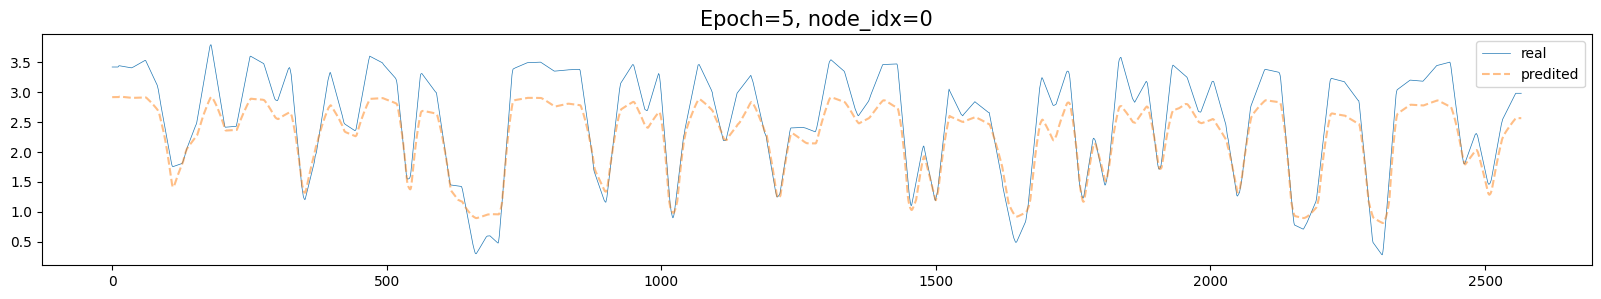

In [12]:
lrnr1.figs[-1]

In [14]:
lrnr2 = RGCN_Learner()
lrnr2.lags = 24
lrnr2.train_ratio = 0.8
lrnr2.load(yP)

lrnr2.nof_filters = 16
lrnr2.model = GConv_LSTM(node_features=lrnr2.lags, filters=lrnr2.nof_filters).to(device)
lrnr2.optimizer = torch.optim.Adam(lrnr2.model.parameters(), lr=10/1000)

lrnr2.get_batches(128)
for e in range(10):
    lrnr2.learn()

epoch=1  loss=0.1221006289124488827184677       
epoch=2  loss=0.035867717815563082522192            
epoch=3  loss=0.0225656201946549123155136       
epoch=4  loss=0.01899836171651259280503273  
epoch=5  loss=0.0162991018150933101863861       
epoch=6  loss=0.01484622922725975590882969  
epoch=7  loss=0.01406821407726965878712082  
epoch=8  loss=0.01339947487576864700816536  
epoch=9  loss=0.01272667612647637737688732  
epoch=10     loss=0.0121957020601257682626114   

In [15]:
yPhat = np.concatenate([np.array([list(lrnr2.yhat[0])]*lrnr2.lags),lrnr2.yhat],axis=0)
yPhat[yPhat<0] = 0

In [16]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

In [17]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

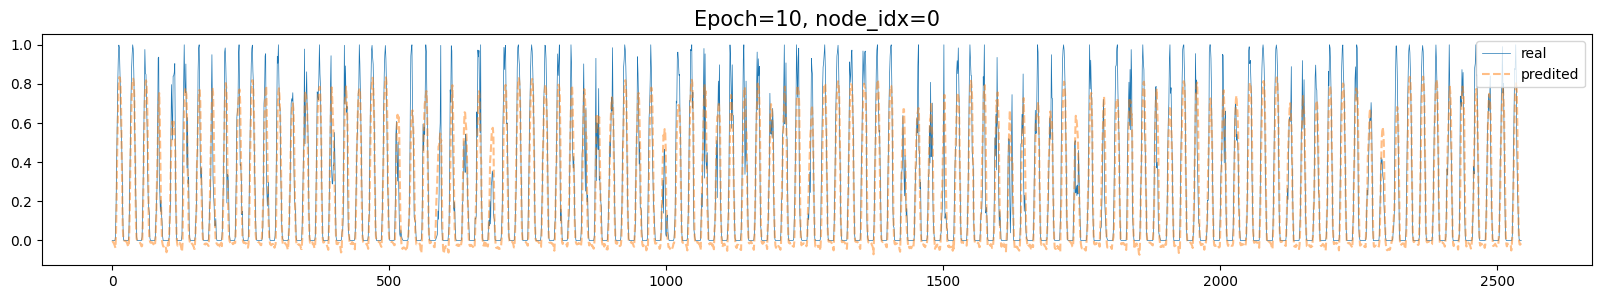

In [18]:
lrnr2.figs[-1]

In [19]:
classic = ((y - yhat)[LEN_TR:,:]**2).mean()
proposed = ((y - yUhat*yPhat)[LEN_TR:,:]**2).mean()
print('classic(mse)', round(classic,4))
print('proposed(mse)', round(proposed,4))

classic(mse) 0.1249
proposed(mse) 0.0959

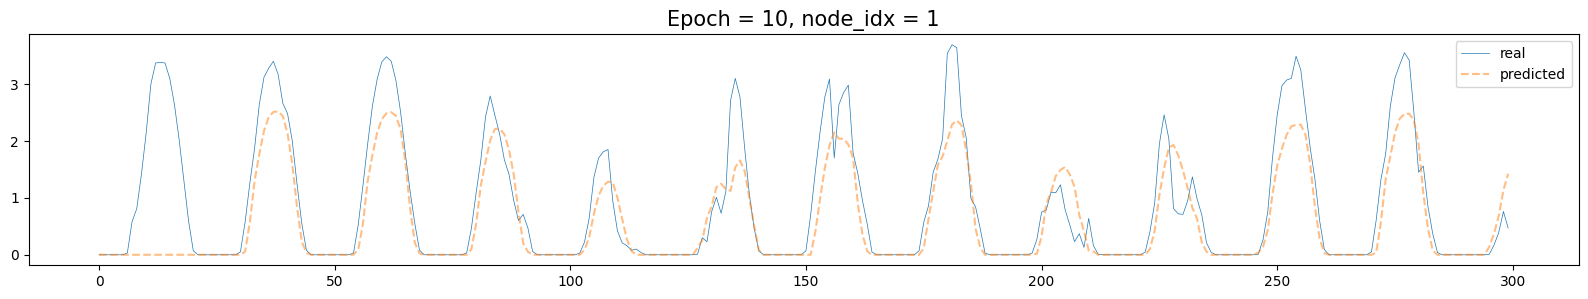

In [40]:
rslt_plot(lrnr, y, yUhat*yPhat, 300, 1)

In [26]:
%run test_model/glstm

In [91]:
s1 = Simulator()

In [ ]:
s1.simulate(
    n_iteration = 25,
    lags = [24],
    filters = [4, 8, 12, 16, 32],
    epoch = [10],
    Model = GConv_LSTM,
    lr = 10/1000
)

batch=6  t=119   loss=0.9959403276443481        

In [93]:
import os
fnames = ['./test/'+l for l in os.listdir('./test') if l[0] != '.']
fnames 

In [94]:
import os

def NumIter(model_name, fnames):
    count = 0  # 'gconvlstm'이 포함된 파일 개수를 저장할 변수
    # 디렉토리 내의 모든 파일 검사
    for file_path in fnames:
        file_name = os.path.basename(file_path)
        if model_name in file_name:
            count += 1

    print(f"{model_name}이 포함된 파일 개수: {count}")

In [95]:
NumIter('dcrnn', fnames)
NumIter('gconvgru', fnames)
NumIter('gconvlstm', fnames)

dcrnn이 포함된 파일 개수: 30
gconvgru이 포함된 파일 개수: 27
gconvlstm이 포함된 파일 개수: 50

In [96]:
df = pd.concat([pd.read_csv(fname) for fname in fnames]).reset_index(drop=True)

In [99]:
def summary_table(df):
    model_name = input("모델명을 입력하세요: ")
    df = df[df['model']== model_name]
    df_summary = df.groupby(by=['model','method','lags','nof_filters']).agg({'mse':[np.mean, np.std]}).reset_index()
    df_classic = df_summary[df_summary['method']=='classic']
    df_proposed = df_summary[df_summary['method']=='proposed'].reset_index()[['method','mse']]
    df_compare = pd.concat([df_classic, df_proposed], axis=1)
    return df_compare

In [101]:
summary_table(df)

In [103]:
summary_table(df)

In [104]:
summary_table(df)